# Lab 10: Dimensionality Reduction

In this lab, you will learn gain more experience with ranks and dimensionality reduction and learn how to use it in data science.

## Lab 10.A: SVD Tutorial with Questions (25% of the lab grade)

Let us start by importing two libraries, numpy and matplotlib. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

First, we will learn how to create matrices of any dimension that have a specified rank. To create a rank-1 matrix $A_{nxm}$, it is sufficient to define two vectors, $u_{[nx1]}$ and $v_{[mx1]}$ and find their *outer product*, $A = u \cdot v^T$.

In [2]:
# A simple rank-1 matrix of dimension 5x4
u = np.transpose([[1,1,1,1,1]])
print('vector u:  ')
print(u)
v = np.transpose([[1,2,3,4]])
print('vector v:   ')
print(v)
A = np.dot(u,np.transpose(v))
print('matrix A:   ')
print(A)
print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A)) 

# A more complicated rank-1 matrix of dimension 5x4
u = np.transpose([[1,2,3,4,5]])
print('vector u:  ')
print(u)
v = np.transpose([[1,2,3,4]])
print('vector v:   ')
print(v)
A = np.dot(u,np.transpose(v))
print('matrix A:   ')
print(A)

print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A))
print('size of A:')
print(np.shape(A))
print('type of objects u and A:')
print(type(u), type(A))

vector u:  
[[1]
 [1]
 [1]
 [1]
 [1]]
vector v:   
[[1]
 [2]
 [3]
 [4]]
matrix A:   
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
rank of matrix A:   
1
vector u:  
[[1]
 [2]
 [3]
 [4]
 [5]]
vector v:   
[[1]
 [2]
 [3]
 [4]]
matrix A:   
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]
 [ 5 10 15 20]]
rank of matrix A:   
1
size of A:
(5, 4)
type of objects u and A:
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


To generate a rank-2 matrix $A_{nxm}$, it is sufficient to define two pairs of vectors $(u_1,v_1)$ and $(u_2,v_2)$, where length of $u_1$ and $u_2$ is $n$ and length of $v_1$ and $v_2$ is $m$, calculate their *outer products* and add them up, $A = u_1 \cdot v_1^T + u_2 \cdot v_2^T$. 

In [3]:
# A simple rank-2 matrix of dimension 5x4
u1 = np.transpose([[1,1,1,1,1]])
v1 = np.transpose([[1,0,2]])
print('vector u1:  ')
print(u1)
print('vector v1:   ')
print(v1)

u2 = np.transpose([[1,2,1,2,1]])
v2 = np.transpose([[0,1,1]])
print('vector u2:  ')
print(u2)
print('vector v2:   ')
print(v2)

print("Shape of u1 dot v1 {}".format(np.dot(u1,np.transpose(v1)).shape))
print("Shape of u2 dot v2 {}".format(np.dot(u2,np.transpose(v2)).shape))

A = np.dot(u1,np.transpose(v1)) + np.dot(u2,np.transpose(v2))
print('matrix A:   ')
print(A)
print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A))

vector u1:  
[[1]
 [1]
 [1]
 [1]
 [1]]
vector v1:   
[[1]
 [0]
 [2]]
vector u2:  
[[1]
 [2]
 [1]
 [2]
 [1]]
vector v2:   
[[0]
 [1]
 [1]]
Shape of u1 dot v1 (5, 3)
Shape of u2 dot v2 (5, 3)
matrix A:   
[[1 1 3]
 [1 2 4]
 [1 1 3]
 [1 2 4]
 [1 1 3]]
rank of matrix A:   
2


A more compact way to do exactly the same is to create a matrix $U$ by concatenating vectors $u_1$ and $u_2$ and matrix $V$ by concatenating vectors $v_1$ and $v_2$, as $U = [u_1 u_2]$ and $V = [v_1 v_2]$   

In [4]:
# An alternative way of creating a rank-2 matrix
U = np.concatenate((u1,u2), axis = 1)
print(U)
V = np.concatenate((v1,v2), axis = 1)
print(V)
A = np.dot(U,np.transpose(V))
print('matrix A:   ')
print(A)
print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A))

[[1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]]
[[1 0]
 [0 1]
 [2 1]]
matrix A:   
[[1 1 3]
 [1 2 4]
 [1 1 3]
 [1 2 4]
 [1 1 3]]
rank of matrix A:   
2


**Observation**

To create an n-rank matrix, we must have matrices u dot v, where u contains n linearly independent column vectors and v contains n (not necessarily linearly independent) row vectors. 

When we perform the dot product, we are essentially applying linear operations on the u matrix. So we can say that the resulting matrix's row and column vectors are just linear combinations of u's column vectors.

Recall that a rank of a matrix is the maximum number of rows or columns that are needed to construct the whole matrix. So the property of this matrix is that all the rows and columns must be linearly independent from each other. 
The row rank and the column rank must be the same!!

**Question 1**. Explain why the previous 2 ways of creating the rank-2 matrix end up in exactly the same result. (*Note*: it is very important to understand why, so thake some time to think about it. It is acceptable to work out your explanation on a piece of paper and submit a photo of it as pdf file)

**Question 2**. Write a piece of code that generates a rank-3 matrix of dimension 6x5

**Answer 1:**

The answer lies in Answer_1_A.png and Answer_1_B.png

**Answer 2:**

In [5]:
# rank-3 with 6 x 5
# u's dimension = 6 x 3
# v's dimension = 3 x 5

u_matrix = [[1,1,1],[1,2,1],[9,2,1],[7,8,6],[8,7,1],[4,3,10]]

# generating a random int matrix 
v_matrix = np.random.randint(10, size=(3, 5))
A_matrix = np.dot(u_matrix, v_matrix)

print('shape of matrix A:   ')
print(A_matrix.shape)
print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A_matrix))

shape of matrix A:   
(6, 5)
rank of matrix A:   
3


Here is another way to quickly generate a large low-rank matrix. 

In [6]:
A = np.dot(np.transpose([[1,1,1,1,1],[1,2,1,2,1]]),np.random.rand(2,100))

**Question 3**. 
- What is the size of matrix A?
- What does the command `np.random.rand(2,100)` do?
- What is the rank of A? Why?

In [7]:
print('shape of matrix A:   ')
print(A.shape)
print('rank of matrix A:   ')
print(np.linalg.matrix_rank(A))

shape of matrix A:   
(5, 100)
rank of matrix A:   
2


**Answer 3:**

The size of matrix A is 5 x 100. 

The command np.random.rand(2, 100) generates a random 2 x 100 matrix.

The rank of A is 2 because the u_matrix only has 2 column vectors to construct the matrix A.

The rank of a zero matrix is always zero.

In [8]:
A = np.zeros((20,4))
print(A)
print(np.linalg.matrix_rank(A))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
0


Let us now load Temple T data set and draw a scatter plot. 

[[-0.49806202  0.40064976]
 [-0.49806202  0.39731642]
 [-0.49806202  0.39398309]
 ...
 [ 0.49806202  0.05398309]
 [ 0.49806202  0.05064976]
 [ 0.49806202  0.04731642]]
The dimensions of A are:  (28226, 2)


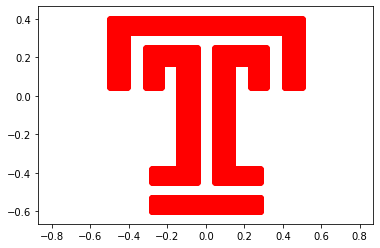

In [9]:
A = np.loadtxt('d_temple.csv', delimiter=",",dtype='float')
print(A)
print('The dimensions of A are: ' , np.shape(A))
plt.scatter(A[:,0],A[:,1],color='red');
plt.axis('equal');

Let us see the effect of some transformations of A.

[[0.18517982 0.95350487]
 [0.65826123 0.50284603]]


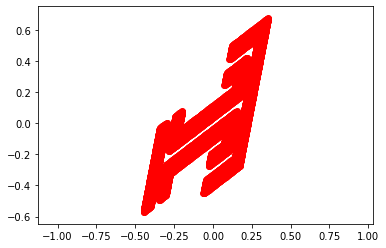

In [10]:
# Generate a random "projection" matrix
T = np.random.rand(2,2)
print(T)
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

[[1, 0], [0, 3]]


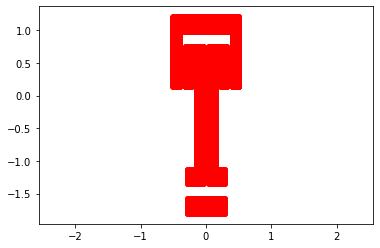

In [11]:
# Generate a "scaling" matrix
T = [[1,0],[0,3]]
print(T)
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

[[0.4535961214255773, 0.8912073600614354], [-0.8912073600614354, 0.4535961214255773]]


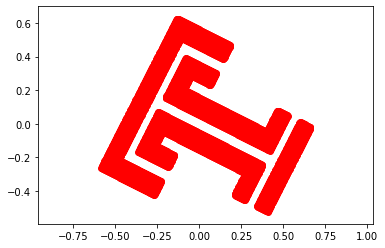

In [12]:
# Generate a "rotation" matrix
angle = 1.1
T = [[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]]
print(T)
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

**Question 4**. Create a letter T that is 2 times wider than its original version and then rotated by 145 degrees counterclock-wise.

**Answer 4:**

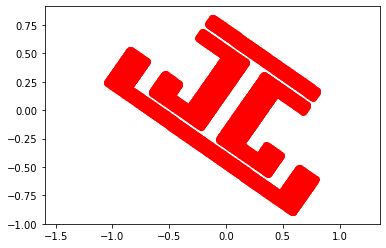

In [13]:
# Matrix to make the T 2 times wider
wider_by_twice = [[2,0],[0,1]]

# Generate a "rotation" matrix
angle = np.radians(145)
T = [[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]]

A3 = np.dot(np.dot(A, wider_by_twice), T)
plt.scatter(A3[:,0],A3[:,1],color='red');
plt.axis('equal');

Let us now create a rank-2 large matrix out of Temple data, which has 100 attributes (columns).

(28226, 100)


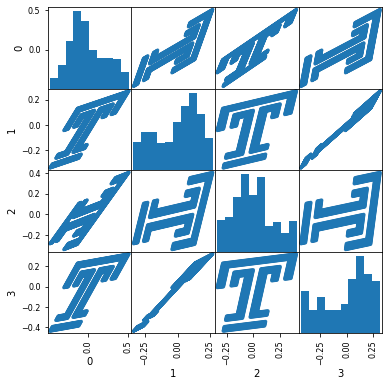

In [14]:
T = np.random.rand(2,100)
Abig = np.dot(A, T)
print(np.shape(Abig))
# to plot a scatterplot of the first 4 columns... it will take a minute...

pd.plotting.scatter_matrix(pd.DataFrame(Abig[:,1:5]), alpha=0.2, figsize=(6, 6));

**Question 5**. What is the rank of `Abig` and why?

Let us perform SVD on matrix `Abig`.

**Answer 5:**

In [15]:
print('Rank of Abig {}'.format(np.linalg.matrix_rank(Abig)))

Rank of Abig 2


Rank of Abig is 2 because in this case, we only needed 2 column vectors to construct Abig. Essentially, Abig's entries are just linear combination of A with randomly generated 2 x 100 T matrix. 

In [16]:
# SVD
U,s,V = np.linalg.svd(Abig,full_matrices=0)
print(U.shape, s.shape, V.shape)
print('the first 10 singular values:', s[0:10])

(28226, 100) (100,) (100, 100)
the first 10 singular values: [3.59178667e+02 1.51778128e+02 9.19484290e-14 6.65268380e-14
 3.71576877e-14 3.25520107e-14 3.25520107e-14 3.25520107e-14
 3.25520107e-14 3.25520107e-14]


Let us find a rank-2 approximation of `Abig`

In [17]:
# Find rank-2 aproximation
k = 2

# RECALLED THE U S V image shown during the lecture
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
# ord=2 is 2-norm or Freubenius norm, 
# look at doc for the formula on how to calculate it
print('Norm of Abig:  ', np.linalg.norm(Abig, ord=2))
print('First 10 singular values: ',  s[0:10])
print('Norm of difference Abig-Ak = ', np.linalg.norm(Abig - Ak, ord=2))

Norm of Abig:   359.1786666113625
First 10 singular values:  [3.59178667e+02 1.51778128e+02 9.19484290e-14 6.65268380e-14
 3.71576877e-14 3.25520107e-14 3.25520107e-14 3.25520107e-14
 3.25520107e-14 3.25520107e-14]
Norm of difference Abig-Ak =  5.126236101269335e-13


**Question 6**.
- Find the Frobenius norm of the difference `Abig - Ak`
- Using SVD find the best rank-1 approximation of `Abig`. What is the 2 norm and Frobenius norm of the difference? Discuss.
- Using SVD find the best find rank-3 approximation of `Abig`. What is the 2 norm and Frobenius norm of the difference? Discuss.

**Answer 6:**

In [18]:
# finding the Frobenius norm 
print('Norm of difference Abig-Ak = ', np.linalg.norm(Abig - Ak, ord=2))

# SVD to find best rank-1 approximation with 2 norm difference
k = 1
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print('Norm of difference Abig-Ak (for rank 1) = ', np.linalg.norm(Abig - Ak, ord=2))

# SVD to find best rank-3 approximation with 2 norm difference
k = 3
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print('Norm of difference Abig-Ak (for rank 3) = ', np.linalg.norm(Abig - Ak, ord=2))

Norm of difference Abig-Ak =  5.126236101269335e-13
Norm of difference Abig-Ak (for rank 1) =  151.77812788024065
Norm of difference Abig-Ak (for rank 3) =  5.193395641392531e-13


Let us visualize the scatter-plot of the first two columns of `U` (the first two left singular vectors)

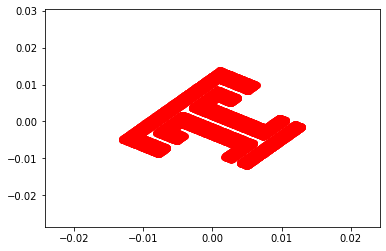

In [19]:
plt.scatter(U[:,0],U[:,1],color='red');

Perfect:  the first two columns of `U` are sufficient to reconstruct letter T!

Let us generate a noisy version of `Abig`

In [20]:
Abig_noise = Abig + np.random.randn(28226,100)*0.5 

**Question 7**. 
- Plot the scatterplot of the first 5 columns of `Abig_noise`. Discuss what you see.
- Perform SVD on `Abig_noise`. What are the first 10 singular values?
- Find the rank-2 approximation of this `Abig_noise`. What is the norm of the difference?
- Plot the scatterplot of the first two columns of `U`. Discuss what you see and why.

**Answer 7:**

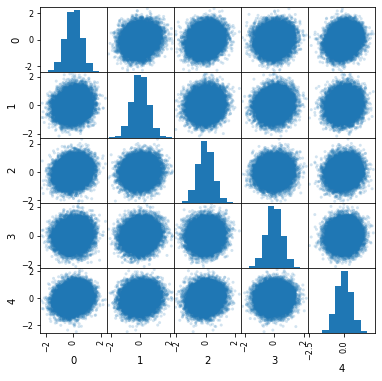

In [24]:
# plot the scatter plot of the first 5 columns of Abig_noise
pd.plotting.scatter_matrix(pd.DataFrame(Abig_noise[:,0:5]), alpha=0.2, figsize=(6, 6));

By plotting the scatter_matrix of the first 5 columns of Abig_noise, we observe that generally, if 2 columns are plotted against each other, they appear to have a circular shape. 

It looks like most of the values in each of the first 5 columns are randomly distributed and they seems to spread out evenly because they make the circular shape.

In [25]:
# SVD
U,s,V = np.linalg.svd(Abig_noise, full_matrices=0)

# get the first 10 singular values
print('the first 10 singular values:', s[0:10])

the first 10 singular values: [369.30167418 173.92873925  88.89860944  88.26904208  88.15244787
  88.01690027  87.98581977  87.90610556  87.82687042  87.68648748]


In [26]:
# rank 2 approx 
# Find rank-2 aproximation
k = 2

# RECALLED THE U s V image shown during the lecture
# Ak, where k = 2 is the rank-2 approximated matrix for the original Abig_noise
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
# ord=2 is 2-norm or Freubenius norm, 
# look at doc for the formula on how to calculate it
print('Norm of Abig:  ', np.linalg.norm(Abig, ord=2))
print('Norm of difference Abig_noise-Ak = ', np.linalg.norm(Abig_noise - Ak, ord=2))

Norm of Abig:   359.1786666113625
Norm of difference Abig_noise-Ak =  88.89860943687371


The norm difference between Abig_noise and its rank-2 approximated Ak is 88.89. 

As we learned above, when a matrix has its values to be randomly generated. The values row-wise and column-wise will have a very low probability of relating to each other linearly. In other words, the rows and columns have a low chance of being each other's linear combination. Therefore, its rank = min(# of row, # of column). 

In [29]:
print('Rank of Abig_noise is {}'.format(np.linalg.matrix_rank(Abig_noise)))

Rank of Abig_noise is 100


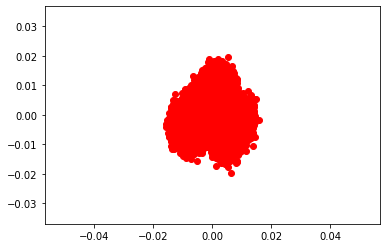

In [30]:
# plotting the first 2 columns of matrix U
plt.scatter(U[:,0],U[:,1],color='red');
plt.axis('equal');

I see that the first 2 columns of U create a glob on the graph and it does not show any linear or other type of mathematical relationship.

## Lab 10.B: Apply dimensionality reduction on real data (75% of the lab grade)

In this par tof the lab you will be studying 2 real-life data sets: *Iris* and *Newsgroups*.

### Newsgoups data analysis

Download `documents.csv`, `newsgroup.csv`, `groupnames.csv`, `wordlist.csv` to your local folder. This data set is about 16,242 news articles. Each article is represented as a bag-of-word vector containing counts of 100 words from a dictionary. This is saved in `documents`. The dictionary words are represented in the `wordlist`. Each document belongs to one of the 4 types of articles, listed in `froupnames`. We know the assignment of each document to one of those groups based on `newsgroup` values.

In [31]:
wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')

**Question 8**. 
- find the counts of each of the 100 words and plot the bar plot of the counts. Which words are the most popular?
- find the counts of the 4 types of articles in the documents. Which type of article is the most popular?

Since the `documents` matrix is huge, we cannot do too much to further explore it. That is why we will try with the SVD.

**Answer 8:**

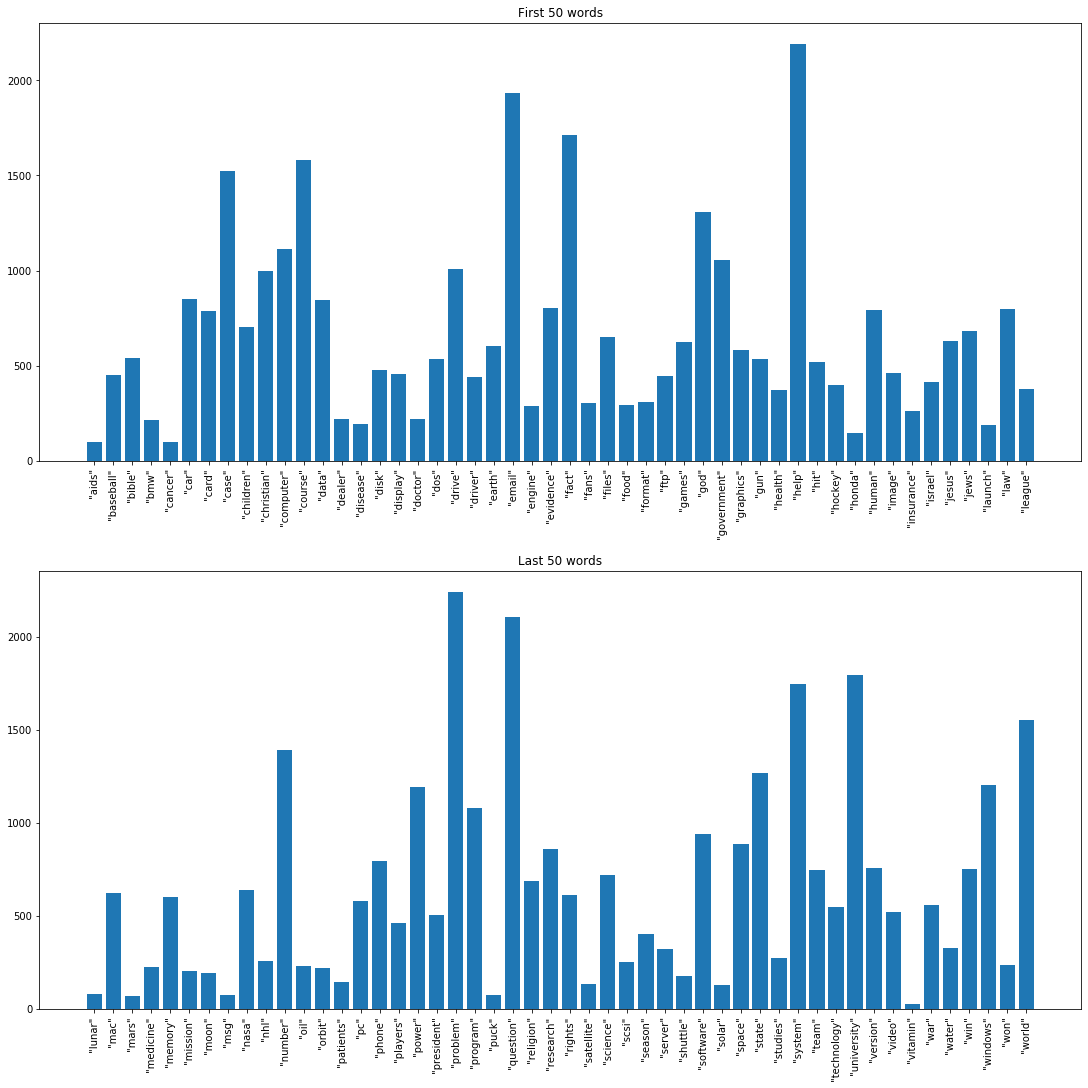

In [49]:
# counts of each of the 100 words
# according to this source, you can apply sum method on a DataFrame
# to get sum of each column
df = pd.DataFrame(documents)
word_counts = list(df.sum(axis = 0, skipna = True))

# bar plot of the counts
# tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig, axs = plt.subplots(2, 1, figsize=(15,15), constrained_layout=True)
axs[0].bar(wordlist[:50], word_counts[:50])
axs[0].set_xticklabels(wordlist[:50], rotation=90)
axs[0].set_title("First 50 words")

axs[1].bar(wordlist[50:], word_counts[50:])
axs[1].set_xticklabels(wordlist[50:], rotation=90)
axs[1].set_title("Last 50 words")
plt.show()

The most popular words are case, course, email, facts, god, help, number, problem, question, system, university and world.

In [60]:
print(np.unique(newsgroup, return_counts=True))
print(groupnames)

(array([1, 2, 3, 4]), array([4605, 3519, 2657, 5461]))
['comp.*' 'rec.*' 'sci.*' 'talk.*']


It looks like talk.* is the most popular type of article.

**Question 9**.
- what is the rank of `documents`?
- perform SVD of documents
- list the first 10 singular values. Plot all 100 singular values. What can we conclude with the respect to low-rank approximation of the matrix?
- let us plot the scatterplot of the first 2 rows of `V`. Use plt.text method to plot the name of each dot (use `wordlist` values) above each dot. Discuss what you see.
- let us plot the scatterplot of the first 2 columns of `U`. Since `U` is to big, you can randomly select 1000 rows to plot. Use 4 colors to render each dot by its group name. Discuss what you see.

The following lines of code will be useful for answering Question 9. Consider reusing them in your study:

**Answer 9:**

In [62]:
print("The rank of documents is {}".format(np.linalg.matrix_rank(documents)))

The rank of documents is 100


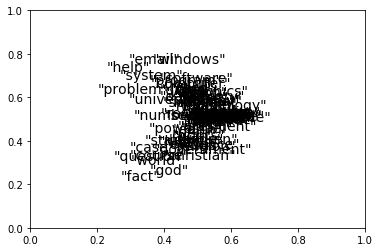

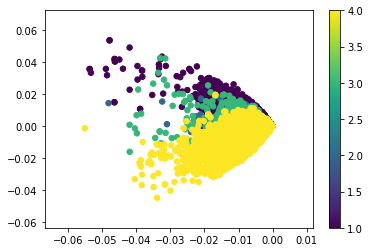

1
2
3
4


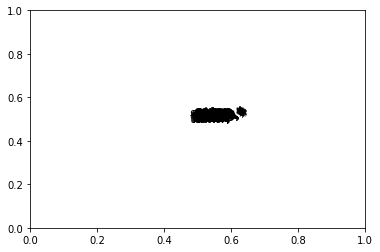

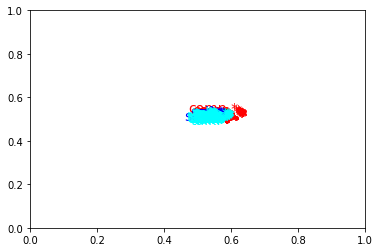

In [63]:
# SVD of Document
U,s,V=np.linalg.svd(documents,full_matrices=0)

for x,y,text in zip(V[0]+0.5,V[1]+0.5,wordlist):
    plt.text(x,y,text,fontsize=14)
plt.figure()

sc=plt.scatter(U[:,0],U[:,1],30,newsgroup,facecolors='none')
plt.colorbar(sc)
plt.show()

r=np.random.randint(0,16242,100)
plt.figure()
for x,y,groupname in zip(U[r,0]+0.5,U[r,1]+0.5,groupnames[newsgroup[r]-1]):
    plt.text(x,y,groupname,fontsize=14)

c = ['red','green','blue','cyan']
plt.figure()
for i in range(1,5):
    q=np.where(newsgroup==i)[0]
    r1 = np.random.randint(0,len(q),50)
    r=q[r1]
    for x,y,groupname in zip(U[r,0]+0.5,U[r,1]+0.5,groupnames[newsgroup[r]-1]):
        plt.text(x,y,groupname,color=c[i-1],fontsize=14)
    print(i)

In [64]:
# listing the first 10 singular values
print('the first 10 singular values:', s[0:10])

the first 10 singular values: [85.83514637 56.41449164 44.17905789 43.1547786  41.97727192 40.83237512
 40.44698116 39.35243106 38.69233467 36.93978716]


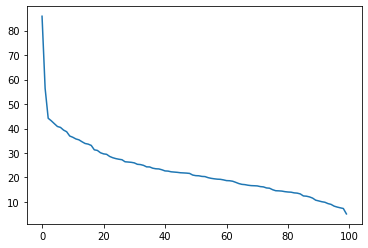

In [73]:
# plotting all 100 singular values
plt.plot(s)

In [74]:
print(U.shape)
print(s.shape)
print(V.shape)

(16242, 100)
(100,)
(100, 100)


As you can observe from the plot of 100 singular values, you can see that the first 2 singular values are of the highest order but once you get to the third singular value, the magnitude only decreases a little bit and plateau out
but the rate of change is somewhat flat out but not all the way out. 

What this means is that the first 2 singular values have a lot of siginificance in helping us in approximating the original data but i guess the top 10 (aka. the first 10 singular values) also hold significance in approximating as well. 

So I think a matrix U of rank 10 or 15 would be sufficient for approximating. 

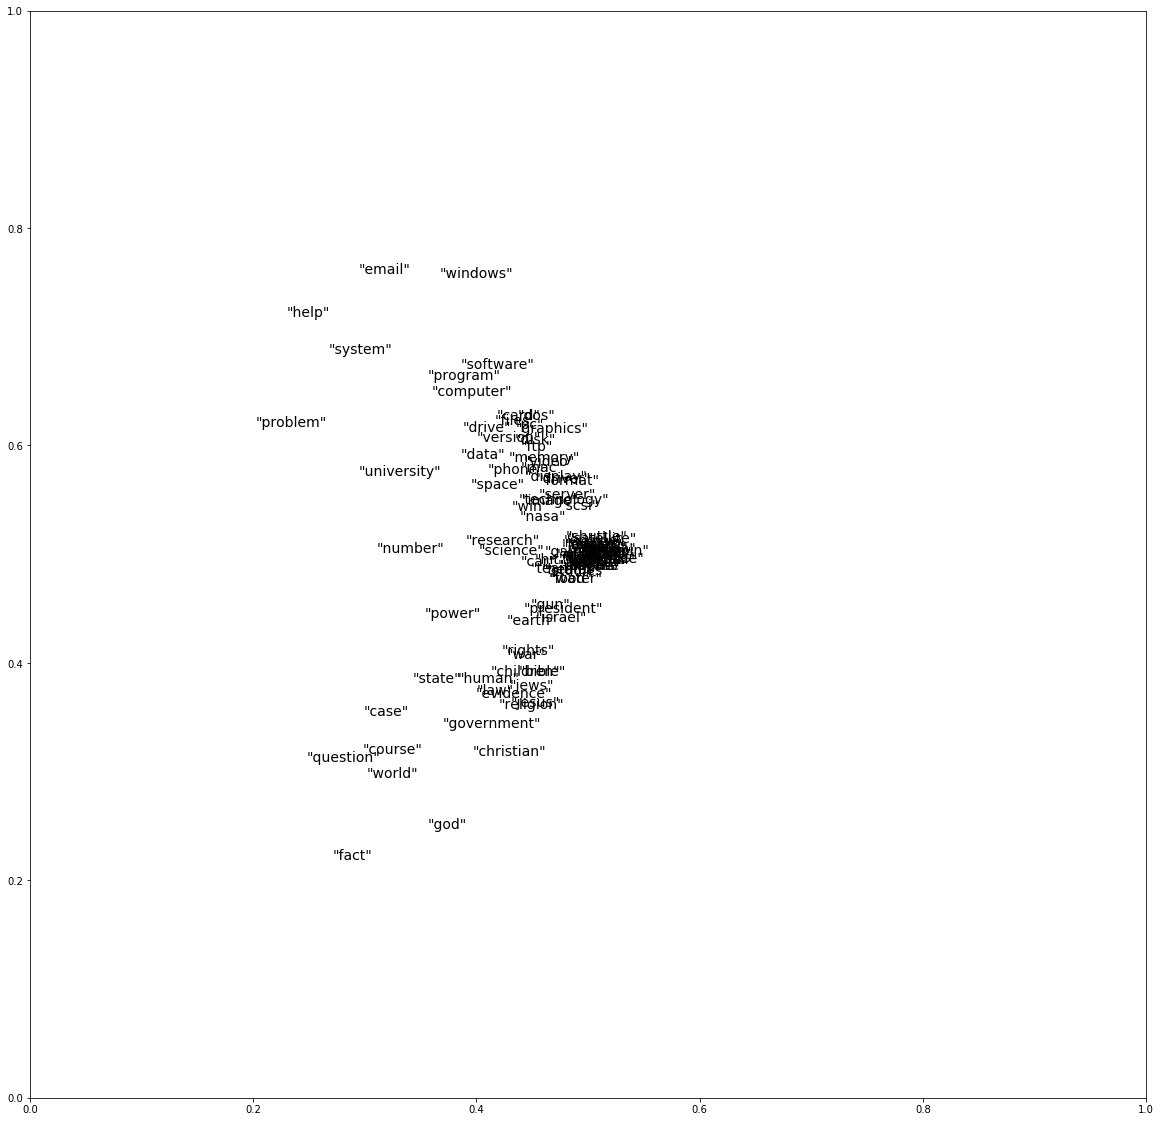

In [82]:
#plot the scatterplot of the first 2 rows of V. Use plt.text method to plot the name of each dot (use wordlist values) above each dot.
plt.figure(figsize=(20,20))
for x,y,text in zip(V[0] + 0.5, V[1] + 0.5, wordlist):
    plt.text(x,y,text,fontsize=14)
plt.show()

From the above plot, you can see clearly that words that are related to each other are closer together. For example, words such as email, windows, help, system are close together while words such as software, program, computer are closed together. 

If you think about x as the values in V's first row and y as the values in V's second row then if 2 words are closely related to each other, they would not deviate that much in their (x, y) positions. For example, if the first row has the word 'software' with a score of .4 and the second row has the word 'software' with a score of .8. Then we should expect words like 'program' or 'computer' should have a score in the first row to be near .4 and a score in the second row to be near .8. 

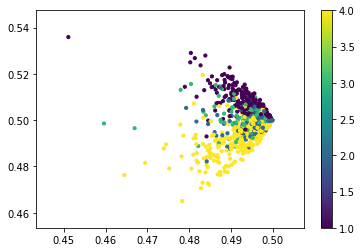

In [94]:
# plot the scatterplot of the first 2 columns of U. Since U is to big, you can randomly select 1000 rows to plot. Use 4 colors to render each dot by its group name. Discuss what you see.
rd_inx = np.random.choice(np.arange(len(documents)), 1000, replace=False)
sc=plt.scatter(U[rd_inx,0] + 0.5,U[rd_inx,1] + 0.5,10,newsgroup[rd_inx],facecolors='none')
plt.colorbar(sc)
plt.show()

From what I can see by plotting a random 1000 rows from the first 2 columns of the U matrix is that the cluster seem
to mesh together and it is a little bit hard to distinguish the clusters but still we can observe some distinct clusters such as yellow or purple.

**Question 10**. 
- transform the document data set by subtracting mean of each column from each corresponding column (scaling to mean zero). Then, repeat question 9. Which results do you like more and why?

**Extra credit (15%)**. 
- Instead of SVD, let us explore a few other approaches for dimensionality. 
- t-sne is a famous method for dimensionality reduction. Read documentation about sklearn.manifold.TSNE and convert the newsgroup data into 2 dimentions. Plot a scatteplot of the resulting data set and discuss how it differs from the SVD result.

**Extra credit (15%)**
- adopt code from https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py to our newsgroups data. NNMF and LDA are "topic analysis" algorithms related to SVD. Discuss in few sentences how you can you interpret the results.

**Answer 10:**

In [95]:
# apply scaling to mean 0
# https://stackoverflow.com/questions/35169368/subtract-every-column-in-dataframe-with-the-mean-of-that-column-with-python
documents = documents -documents.mean()

In [96]:
# SVD of Document
U,s,V=np.linalg.svd(documents,full_matrices=0)

In [97]:
# listing the first 10 singular values
print('the first 10 singular values:', s[0:10])

the first 10 singular values: [65.5118502  56.4051391  44.56009744 44.00542295 41.96601416 40.75817502
 40.6593369  38.71964346 38.56772613 36.93432396]


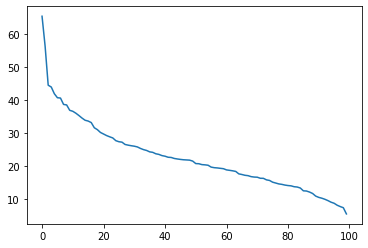

In [98]:
# plotting all 100 singular values
plt.plot(s)

Comparing this plot to number 9, we can clearly see a steeper drop and the top k singular values are of higher magnitude. By looking at this, a matrix of rank 7 or 8 is sufficient for approximation.

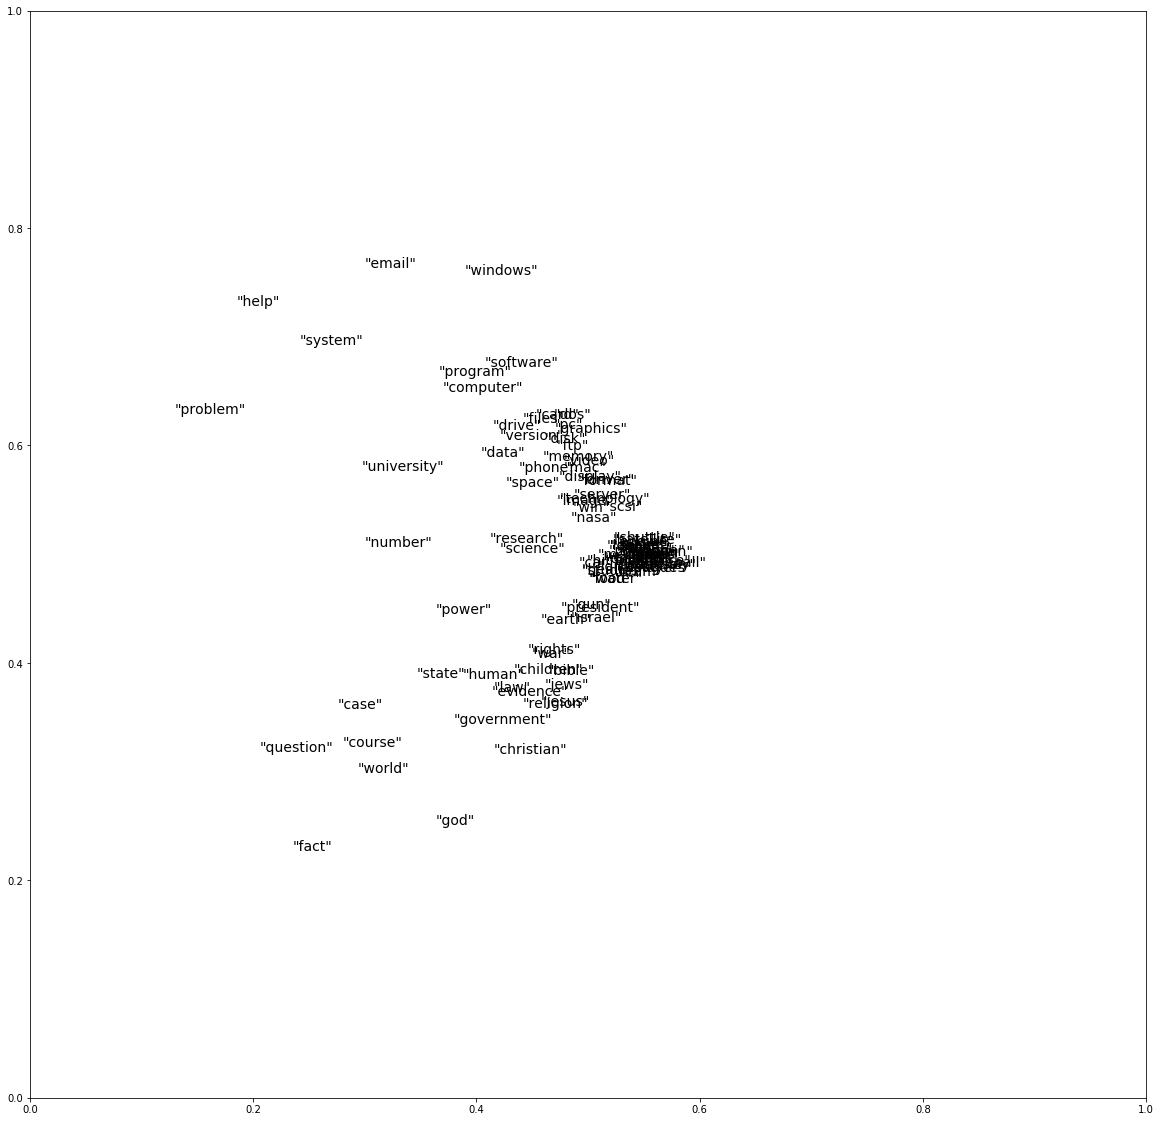

In [99]:
#plot the scatterplot of the first 2 rows of V. Use plt.text method to plot the name of each dot (use wordlist values) above each dot.
plt.figure(figsize=(20,20))
for x,y,text in zip(V[0] + 0.5, V[1] + 0.5, wordlist):
    plt.text(x,y,text,fontsize=14)
plt.show()

Here we can see that the words are not as clumped up as comparing to number 9.

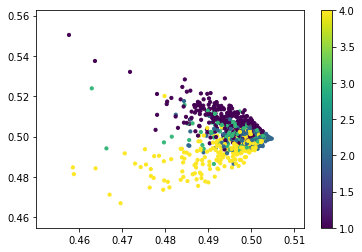

In [100]:
# plot the scatterplot of the first 2 columns of U. Since U is to big, you can randomly select 1000 rows to plot. Use 4 colors to render each dot by its group name. Discuss what you see.
rd_inx = np.random.choice(np.arange(len(documents)), 1000, replace=False)
sc=plt.scatter(U[rd_inx,0] + 0.5,U[rd_inx,1] + 0.5,10,newsgroup[rd_inx],facecolors='none')
plt.colorbar(sc)
plt.show()

Here we can clearly see that the clusters are much more distinct than number 9 and some of the points are not meshed up into other clusters.

**Extra credit (15%) Answer**. ON t-SNE

In [103]:
from sklearn.manifold import TSNE
rd_inx = np.random.choice(np.arange(len(documents)), 1000, replace=False)
documents_embedded = TSNE(n_components=2).fit_transform(documents[rd_inx])

(1000, 2)


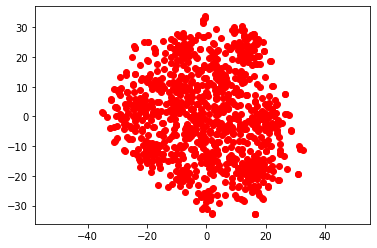

In [115]:
print(documents_embedded.shape)
# Plot a scatteplot of the resulting data set and discuss how it differs from the SVD result.
plt.scatter(documents_embedded[:,0], documents_embedded[:,1],color='red');
plt.axis('equal');
#plt.scatter(pd.DataFrame(documents_embedded).iloc[:,0], pd.DataFrame(documents_embedded).iloc[:,1])
#plt.show()

From looking at this plot, it seems like they are pretty randomly distributed but forms a circular blob. 

#### Extra Credit (15%) Answer
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
According to this source, we must transform our documents into a corpus where it takes the form of an array and each element is a string contains words from one document.

So it would be something like 
corpus = [
...     'This is the first document.',
...     'This document is the second document.',
...     'And this is the third one.',
...     'Is this the first document?',
... ]

In [174]:
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)

In [182]:
# must use wordlist to translate number encoding into actual string
def bag_of_words_to_corpus(df):
    corpus = []
    # for each document
    for index, row in df.iterrows():
        word = ""
        for i in range(len(df.columns)):
            if row[i] == 1:
                # row.index[i] returns the index of where I can 
                # get the actual word
                word += str(wordlist[row.index[i]]) + " "
        corpus.append(word)
    return corpus
corpus = bag_of_words_to_corpus(pd.DataFrame(documents))

In [183]:
print(corpus[:10])

['"email" "research" "software" "system" "video" ', '"state" ', '"files" "ftp" "version" ', '"email" "pc" "university" ', '"ftp" "image" "program" "version" ', '"card" "human" "image" ', '"email" "format" "graphics" "mac" "number" "software" ', '"data" "email" "human" "video" ', '"computer" "data" "email" "format" "human" "university" "video" ', '"email" "help" "version" ']


In [185]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data_samples = corpus[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Loading dataset...
done in 0.000s.
Extracting tf-idf features for NMF...
done in 0.089s.
Extracting tf features for LDA...
done in 0.064s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.336s.

Topics in NMF model (Frobenius norm):
Topic #0: windows dos win memory question disk version pc drive server technology driver data case fact space world mac phone number
Topic #1: graphics number question pc image display mac course format computer memory video research human technology world case nasa war hit
Topic #2: card driver video ftp version windows display question memory number pc human data technology world games engine power medicine university
Topic #3: email phone format number research video university mac drive data games question earth case display god nasa space ftp gun
Topic #4: help memory display pc data win fact server drive course format insurance number god power launch question state case dos
Topic #5: softwa

If you look at NMF and LDA, they have a lot of similar topics that have similar words but the topic simply just being shuffled around. NMF's topic 1 look very similar to LDA's topic 9. It would be interesting to see how these 2 techniques would do if we increase the number of documents from the corpus. Overall, they have similar topics but not all similar topics would have the exact same words. 

### Wine Data Analysis
Download 'Wine' dataset from sklearn (sklearn.datasets.load_wine). This is a famous data set for benchmarking of data science algorithms. Please take a moment to learn about it.

**Question 11**.
- How large is the data set?
- Plot the scatter plot for different pairs of attributes. Do you see any correlations? What are the correlations between the attributes?
- Plot the scatterplot between the first two attributes, but this type use different color for different values of `y`. Can you clearly discriminate between different colors on the scatterplot? Plot the same type of the scatter plot, but this time  using different pairs of attributes. Which pair of attributes separates the colors the best?
- What is the rank of `d`?
- Apply SVD on matrix `d`. 
- Look at the singular values. What do they tell us about the possibility to approximate `d` with a lower rank matrix?
- Plot the scatter plot of the first 2 columns of the `U` matrix (the left singular matrix). Is it easier or more dificult to distinguish between different values of `y`? Please discuss your findings.

**Answer 9:**

In [130]:
from sklearn.datasets import load_wine
data = load_wine()
targets = data.target
data = data.data
data.shape

(178, 13)

In [132]:
targets.shape

(178,)

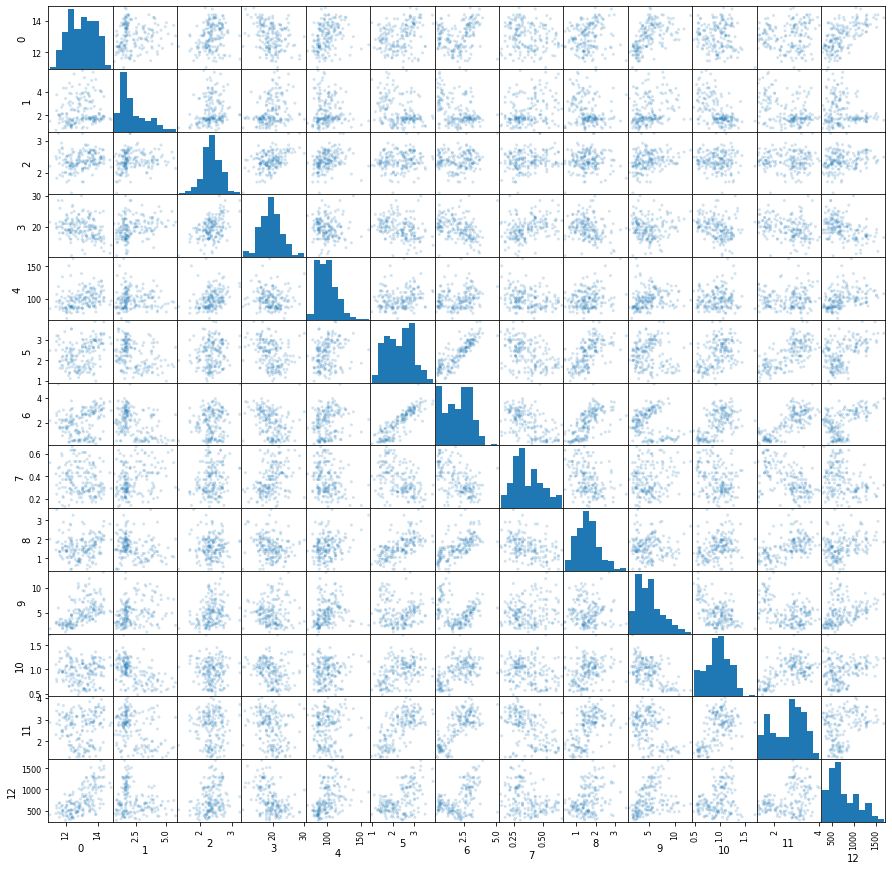

In [135]:
# scatter plot for different pairs of attributes
pd.plotting.scatter_matrix(pd.DataFrame(data), alpha=0.2, figsize=(15, 15));

From above I can observe some trends between 5 and 6, 1 and almost every other (because of the flat line trend).

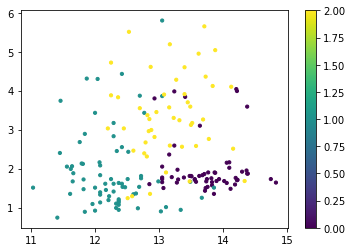

In [138]:
# - Plot the scatterplot between the first two attributes, but this type use different color for different values of `y`. Can you clearly discriminate between different colors on the scatterplot? Plot the same type of the scatter plot, but this time  using different pairs of attributes. Which pair of attributes separates the colors the best?
sc=plt.scatter(data[:,0], data[:,1], 10, targets, facecolors='none')
plt.colorbar(sc)
plt.show()

Yes, I can clearly discriminate between different colors on the scatterplot.

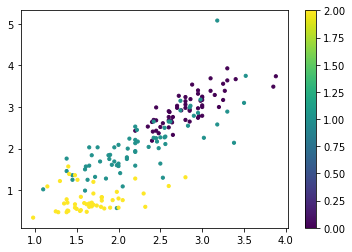

In [139]:
# - Plot the scatterplot between the first two attributes, but this type use different color for different values of `y`. Can you clearly discriminate between different colors on the scatterplot? Plot the same type of the scatter plot, but this time  using different pairs of attributes. Which pair of attributes separates the colors the best?
sc=plt.scatter(data[:,5], data[:,6], 10, targets, facecolors='none')
plt.colorbar(sc)
plt.show()

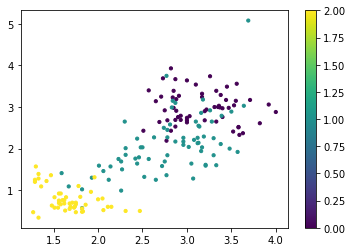

In [141]:
sc=plt.scatter(data[:,11], data[:,6], 10, targets, facecolors='none')
plt.colorbar(sc)
plt.show()

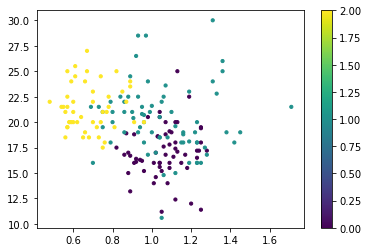

In [142]:
sc=plt.scatter(data[:,10], data[:,3], 10, targets, facecolors='none')
plt.colorbar(sc)
plt.show()

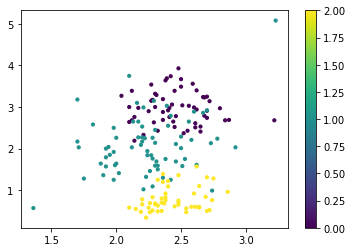

In [151]:
sc=plt.scatter(data[:,2], data[:,6], 10, targets, facecolors='none')
plt.colorbar(sc)
plt.show()

From these observations, it seems like pairs of attributes 5 and 6 and 6 and 11 separate the colors the best. 

In [152]:
np.linalg.matrix_rank(data)

13

In [153]:
U, s, V = np.linalg.svd(data,full_matrices=0)

In [155]:
print(s)

[1.08866699e+04 4.93562048e+02 5.71488432e+01 3.01001254e+01
 1.85428156e+01 1.44630205e+01 1.10360376e+01 5.28989024e+00
 4.45658827e+00 3.57527145e+00 2.60122174e+00 1.98680818e+00
 1.21391398e+00]


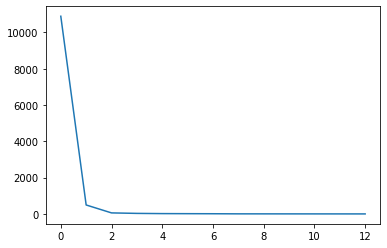

In [157]:
plt.plot(s)

The singular values tell us that the first 2 singular values are of great significance in approximation. But the first one is of the greatest significance overall because look at that drop between attribute 0 and 1 on the above plot.

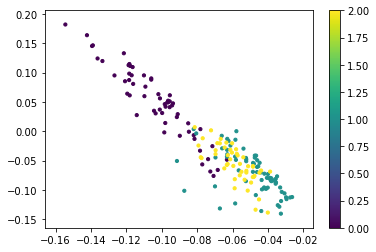

In [158]:
sc=plt.scatter(U[:,0], U[:,1], 10, targets, facecolors='none')
plt.colorbar(sc)
plt.show()

From my observation, it is somewhat hard to distinguish between the different values of y.

In [160]:
# Find rank-2 aproximation
k = 2

# RECALLED THE U S V image shown during the lecture
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
# ord=2 is 2-norm or Freubenius norm, 
# look at doc for the formula on how to calculate it
print('Norm of data:  ', np.linalg.norm(data, ord=2))
print('Norm of difference data-Ak = ', np.linalg.norm(data - Ak, ord=2))

Norm of data:   10886.669906563997
Norm of difference data-Ak =  57.148843225157485


In [165]:
# Find rank-1 aproximation
k = 1

# RECALLED THE U S V image shown during the lecture
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
# ord=2 is 2-norm or Freubenius norm, 
# look at doc for the formula on how to calculate it
print('Norm of data:  ', np.linalg.norm(data, ord=2))
print('Norm of difference data-Ak = ', np.linalg.norm(data - Ak, ord=2))

Norm of data:   10886.669906563997
Norm of difference data-Ak =  493.5620476385896


In [166]:
# Find rank-3 aproximation
k = 3

# RECALLED THE U S V image shown during the lecture
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
# ord=2 is 2-norm or Freubenius norm, 
# look at doc for the formula on how to calculate it
print('Norm of data:  ', np.linalg.norm(data, ord=2))
print('Norm of difference data-Ak = ', np.linalg.norm(data - Ak, ord=2))

Norm of data:   10886.669906563997
Norm of difference data-Ak =  30.10012539446359


In [167]:
# Find rank-3 aproximation
k = 4

# RECALLED THE U S V image shown during the lecture
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
# ord=2 is 2-norm or Freubenius norm, 
# look at doc for the formula on how to calculate it
print('Norm of data:  ', np.linalg.norm(data, ord=2))
print('Norm of difference data-Ak = ', np.linalg.norm(data - Ak, ord=2))

Norm of data:   10886.669906563997
Norm of difference data-Ak =  18.542815608102927


You can see the big jump between rank-1 and rank-2 approximation but then as k increases, it does not improve the norm differences afterwards.

- What is the rank of `d`?
- Apply SVD on matrix `d`. 
- Look at the singular values. What do they tell us about the possibility to approximate `d` with a lower rank matrix?
- Plot the scatter plot of the first 2 columns of the `U` matrix (the left singular matrix). Is it easier or more dificult to distinguish between different values of `y`? Please discuss your findings.